Create a notebook that replicates and implements at least four different cross-validation methods on the iris dataset.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# use the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
#print(type(iris_data))  <class 'numpy.ndarray'>

## Hold-Out Method

将原始数据随机分为两组,一组做为训练集,一组做为验证集,利用训练集训练分类器,然后利用验证集验证模型,记录最后的分类准确率
- 处理简单,只需随机把原始数据分为两组即可
- 没有达到交叉的思想，得到的结果其实并不具有说服性.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
clf = svm.SVC(kernel='linear', C=1, random_state=0)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

## Double Cross-Validation(2-fold Cross Validation)

将数据集分成两个相等大小的子集，进行两回合的分类器训练。在第一回合中，一个子集作为training set，另一个便作为testing set；在第二回合中，则将training set与testing set对换后，再次训练分类器。
- training set样本数太少，通常不足以代表母体样本的分布
- 分子集的变异度大，往往无法达到“实验过程必须可以被复制”的要求。

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
clf = svm.SVC(kernel='linear', C=1, random_state=0)

In [7]:
# 第一轮
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
score1 = clf.score(X_test, y_test)
# 第二轮
clf = svm.SVC(kernel='linear', C=1).fit(X_test, y_test)
score2 = clf.score(X_train, y_train)
score = (score1+score2)/2
print(score)

0.98


## k-fold cross-validation

k折交叉验证，初始采样分割成k个子样本，一个单独的子样本被保留作为验证模型的数据，其他k-1个样本用来训练。交叉验证重复k次，每个子样本验证一次，平均k次的结果或者使用其它结合方式，最终得到一个单一的估测值。
- k-cv可以有效的避免过学习以及欠学习状态的发生,最后得到的结果也比较具有说服性.
- 不能用于不平衡的数据集,不适合时间序列数据

In [8]:
# 5-fold cross-validation
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
# print(scores)  # [0.96666667 1.         0.96666667 0.96666667 1.        ]
score = scores.mean()
print(score)

0.9800000000000001


In [9]:
# 10-fold cross-validation
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
score = scores.mean()
print(score)

0.9733333333333334


## StratifiedGroupKFold

K-Fold 交叉验证的增强版本，主要用于不平衡的数据集。每个折叠将具有与整个数据集中相同的目标变量实例比率。

In [11]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

clf = svm.SVC(kernel='linear', C=1, random_state=0)
stratifiedkf=StratifiedKFold(n_splits=10)
scores = cross_val_score(clf,X,y,cv=stratifiedkf)
score = scores.mean()
print(score)

0.9733333333333334


## Leave P Out Cross Validation

只使用原本样本中的P项来当做验证数据，而剩余的则留下来当做训练数据。重复这个过程，直到整个数据集在 p-样本和 n-p 训练样本的验证集上被划分。
- 所有数据样本都用作训练和验证样本。
- 计算时间长，不适合不平衡数据集

In [12]:
from sklearn.model_selection import LeavePOut,cross_val_score
lpo=LeavePOut(p=2)
lpo.get_n_splits(X)
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_val_score(clf,X,y,cv=lpo)
score = scores.mean()
# print(scores)
print(score)

0.9796420581655481


## Shuffle Split

选择一部分数据做训练集，选择一部分做验证集，训练集+验证机的占比之和可以不为100%。
- 我们可以自由使用训练和验证集的大小，可任意以选择重复的次数
- 不适合不平衡的数据集

In [13]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=0)
shuffle_split=ShuffleSplit(test_size=0.2,train_size=0.6,n_splits=10)
scores = cross_val_score(clf,X,y,cv=lpo)
score = scores.mean()
print(score)

0.9796420581655481


Then pick two cross-validation methods to compare the performance of your best-performing SVM, Decision tree, AdaBoost, and Random Forest models on the breast cancer data from HW5. Choose a suitable metric for performance evaluation. 

In [3]:
# ues the breast cancer data
pd_data = pd.read_csv('wdbc.data', sep=',',header=None)

In [4]:
pd_data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
X = pd_data.iloc[:, 2:].values
Y =  pd_data.iloc[:,1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
# import the package
from sklearn.svm import SVC     # SVM
from sklearn.tree import DecisionTreeClassifier   # Decision tree
from sklearn.ensemble import AdaBoostClassifier  # AdaBoost
from sklearn.ensemble import RandomForestClassifier  # Random Forest 

In [24]:
# find the best-performing by GridSearchCV
from sklearn.model_selection import GridSearchCV

In [29]:
# list the param for SVM
param_grid = {"kernel":["linear","rbf"],
             "C":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
print("Parameters:{}".format(param_grid))

grid_search = GridSearchCV(SVC(),param_grid) 
grid_search.fit(x_train,y_train) 
print("Test set score:{:.2f}".format(grid_search.score(x_test,y_test)))
print("Best parameters for DecisionTree:{}".format(grid_search.best_params_))

Parameters:{'kernel': ['linear', 'rbf'], 'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
Test set score:0.95
Best parameters for DecisionTree:{'C': 0.2, 'kernel': 'linear'}


In [25]:
# list the param for DecisionTree
param_grid = {"criterion":["gini","entropy"],
             "max_depth":[1,2,3,4,5,6]}
print("Parameters:{}".format(param_grid))

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid) 
grid_search.fit(x_train,y_train) 
print("Test set score:{:.2f}".format(grid_search.score(x_test,y_test)))
print("Best parameters for DecisionTree:{}".format(grid_search.best_params_))

Parameters:{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6]}
Test set score:0.94
Best parameters for DecisionTree:{'criterion': 'entropy', 'max_depth': 4}


In [27]:
# list the param for AdaBoostClassifier
param_grid = {"algorithm":["SAMME","SAMME.R"],
             "n_estimators":[10,20,30,40,50,60,70,80,90,100]
             }
print("Parameters:{}".format(param_grid))

tree_clf = tree.DecisionTreeClassifier(criterion= 'entropy',max_depth=4)
grid_search = GridSearchCV(AdaBoostClassifier(tree_clf),param_grid) 
grid_search.fit(x_train,y_train) 
print("Test set score:{:.2f}".format(grid_search.score(x_test,y_test)))
print("Best parameters for AdaBoostClassifier:{}".format(grid_search.best_params_))

Parameters:{'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
Test set score:0.97
Best parameters for AdaBoostClassifier:{'algorithm': 'SAMME', 'n_estimators': 40}


In [26]:
# list the param for RandomForestClassifier
param_grid = {"criterion":["gini","entropy"],
             "max_depth":[1,2,3,4,5,6],
             "oob_score":[True,False]
             }
print("Parameters:{}".format(param_grid))

grid_search = GridSearchCV(RandomForestClassifier(),param_grid) 
grid_search.fit(x_train,y_train) 
print("Test set score:{:.2f}".format(grid_search.score(x_test,y_test)))
print("Best parameters for RandomForestClassifier:{}".format(grid_search.best_params_))

Parameters:{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6], 'oob_score': [True, False]}
Test set score:0.96
Best parameters for RandomForestClassifier:{'criterion': 'gini', 'max_depth': 6, 'oob_score': True}


In [11]:
 # pick the StratifiedGroupKFold and ShuffleSplit methods
from sklearn.model_selection import cross_val_score,StratifiedKFold,ShuffleSplit

In [15]:
# init the clf
svm_clf = SVC(kernel='linear', C=0.2)
tree_clf = DecisionTreeClassifier(criterion= 'entropy',max_depth=4)
bdt_clf = AdaBoostClassifier(tree_clf,algorithm='SAMME',n_estimators=40)
rf_clf = RandomForestClassifier(criterion= 'gini', max_depth=6, oob_score=True)

In [16]:
SGKFold_scores_list = []

In [17]:
# StratifiedGroupKFold
stratifiedkf=StratifiedKFold(n_splits=10)

scores = cross_val_score(svm_clf,X,Y,cv=stratifiedkf)
SGKFold_scores_list.append(scores.mean())

scores = cross_val_score(tree_clf,X,Y,cv=stratifiedkf)
SGKFold_scores_list.append(scores.mean())

scores = cross_val_score(bdt_clf,X,Y,cv=stratifiedkf)
SGKFold_scores_list.append(scores.mean())

scores = cross_val_score(rf_clf,X,Y,cv=stratifiedkf)
SGKFold_scores_list.append(scores.mean())

In [18]:
SGKFold_scores_list

[0.9507832080200501,
 0.9385651629072681,
 0.9771929824561403,
 0.9648809523809524]

In [19]:
SSplit_scores_list = []

In [20]:
# ShuffleSplit
shuffle_split=ShuffleSplit(test_size=0.2,train_size=0.7,n_splits=10)

scores = cross_val_score(svm_clf,X,Y,cv=shuffle_split)
SSplit_scores_list.append(scores.mean())

scores = cross_val_score(tree_clf,X,Y,cv=shuffle_split)
SSplit_scores_list.append(scores.mean())

scores = cross_val_score(bdt_clf,X,Y,cv=shuffle_split)
SSplit_scores_list.append(scores.mean())

scores = cross_val_score(rf_clf,X,Y,cv=shuffle_split)
SSplit_scores_list.append(scores.mean())

In [22]:
SSplit_scores_list

[0.9438596491228071, 0.925438596491228, 0.9710526315789473, 0.9526315789473683]

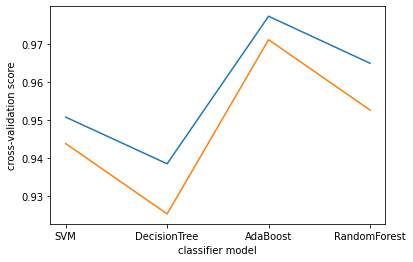

In [24]:
import matplotlib.pyplot as plt

x_axis_data = ['SVM','DecisionTree','AdaBoost','RandomForest']
plt.plot(x_axis_data, SGKFold_scores_list)
plt.plot(x_axis_data, SSplit_scores_list)
plt.xlabel('classifier model')
plt.ylabel('cross-validation score')
plt.show()

In [ ]:
# Refer: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection